# Basic setup

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Importing and setting a bunch of plotting parameters:

# Font stuff to deal with new matplotlib: first set the normal font to times new roman, and then set the math
# font to the regular LaTeX math mode font.
import matplotlib as mpl
import matplotlib.font_manager as font_manager

path = '/Library/Fonts/Arial Unicode.ttf' # CHANGE IF NEEDED!

prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['pdf.fonttype']=42

params = {'text.usetex':False, 'mathtext.fontset':'custom', 'mathtext.default':'regular'}
mpl.rcParams.update(params)

single_col = 8.9 # cm
double_col = 18.3 # cm

def cm2inch(value):
    return value/2.54

FS = 18
LS = 18
MS = 6
MEW= 1.5

# Making sure plots are shown in line:
%matplotlib inline

# Loading the data

In [17]:
# MAXI:

maxi_t, maxi_r, maxi_dr = np.genfromtxt('./FigureData/maxi.dat', usecols=[0,1,2], unpack=True)
maxi_crab = 4.0

In [18]:
# BAT:

bat_t, bat_r, bat_dr = np.genfromtxt('./FigureData/bat.dat', usecols=[0,1,2], unpack=True)
bat_crab = 0.220

In [19]:
# Radio: X stands for X band

radio_t = [59951.125568483796, 59954.08478440972, 59956.1770187963, 59958.11983386574, 59962.19452200232, 59965.14267939815, 59975.02695987269, 59980.142572372686, 59989.050631446764, 59997.034916585646]

F_X = [12, 12, 12, 11.4, 12, 16.5, 24.1, 38.0, 16.0, 24.] 
dF_X = [4, 4, 4, 3.8, 4, 4.2, 4.8, 5.0, 4.0, 8.]
UL_X = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1]

# Plotting

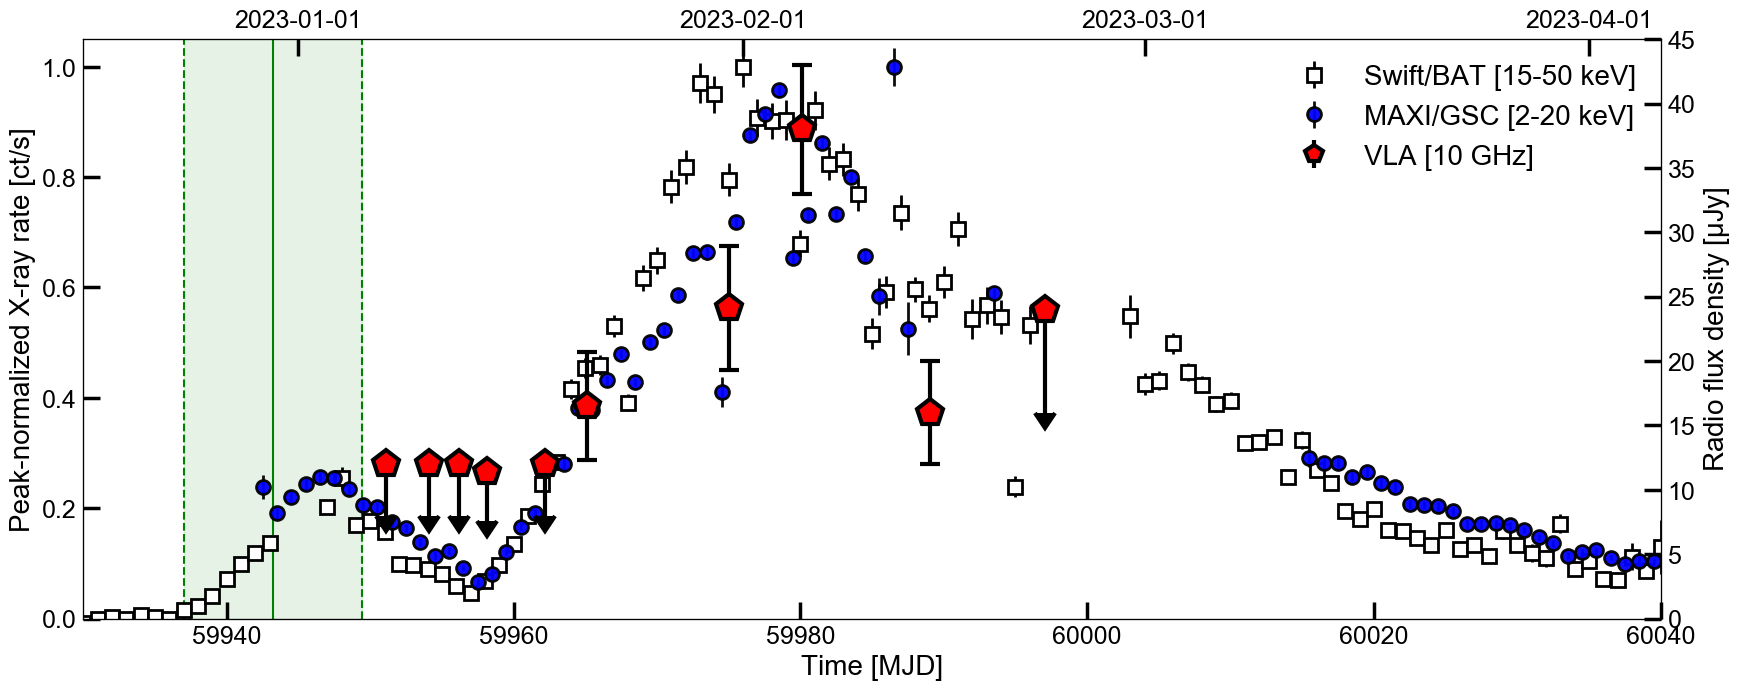

In [20]:
# Defining the figure and axes

fig = plt.figure(figsize=(cm2inch(5*single_col),cm2inch(2*single_col)))
ax = fig.add_subplot(111)

ax.tick_params(labelsize=LS, width=2.5, length=12, axis='both', which='major', pad=5)
ax.tick_params(labelsize=LS, length=8, width=2.5, axis='both', which='minor', pad=5)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.get_yaxis().set_tick_params(direction='in', which='both')
ax.get_xaxis().set_tick_params(direction='in', which='both')

ax.set_xlim(59930, 60040)
ax.set_ylim(-0.0, 1.05)

# Plotting the X-ray data and defining the legend label in radio

ax.errorbar(bat_t, bat_r/max(bat_r), yerr=bat_dr/max(bat_r), fmt='ws', ms=10, mec='k', 
            mew=2, ecolor='k', elinewidth=2, label='Swift/BAT [15-50 keV]')
ax.errorbar(maxi_t, maxi_r/max(maxi_r), yerr=maxi_dr/max(maxi_r), fmt='bo', ms=10, mec='k', 
            mew=2, ecolor='k', elinewidth=2, alpha=0.95, label='MAXI/GSC [2-20 keV]')
ax.errorbar([], [], yerr=[], uplims=[], fmt='rp', mew=3, mec='k', 
             ms=13, elinewidth=3, capsize=7, ecolor='k', label='VLA [10 GHz]')

ax.set_ylabel(r'Peak-normalized X-ray rate [ct/s]', fontsize=FS+2)
ax.set_xlabel(r'Time [MJD]', fontsize=FS+2)

ax.legend(loc=1, fontsize=FS+2, frameon=False)

# Creating a second overlapping axis for the radio data

ax2 = ax.twinx()
ax2.tick_params(labelsize=LS, width=2.5, length=12, axis='both', which='major', pad=5)
ax2.tick_params(labelsize=LS, length=8, width=2.5, axis='both', which='minor', pad=5)

ax2.get_yaxis().set_tick_params(direction='in', which='both')
ax2.get_xaxis().set_tick_params(direction='in', which='both')

ax2.set_xlim(59930, 60040)
ax2.set_ylim(0, 45)

ax2.errorbar(radio_t, F_X, yerr=dF_X, uplims=UL_X, fmt='rp', mew=3, mec='k', 
             ms=20, elinewidth=3, capsize=7, ecolor='k')

ax2.spines['right'].set_color('k')
ax2.yaxis.label.set_color('k')
ax2.tick_params(axis='y', colors='k')
ax2.set_ylabel(r'Radio flux density [$\mu$Jy]', fontsize=FS+2, color='k')

# Creating a third axis to add the dates in easily readable format

ax3 = ax.twiny()
ax3.set_xlim(59930, 60040)
ax3.set_xticks([59945,59976, 60004, 60035])
ax3.set_xticklabels(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'])
ax3.xaxis.set_ticks_position('top')
ax3.get_xaxis().set_tick_params(direction='in', which='both')
ax3.tick_params(labelsize=LS, width=2.5, length=12, axis='both', which='major', pad=5)
ax3.tick_params(labelsize=LS, length=8, width=2.5, axis='both', which='minor', pad=5)

# Plotting the relevant periastron passage with uncertainty:

Norb = np.linspace(0, 100, 101, endpoint=True)
periastrons = 55293.2 + Norb * 150
dperiastrons = 0.2*Norb

for i in range(100):
    PER = 55293.2 + i * 150
    PER_m = PER - 0.2*i
    PER_p = PER + 0.2*i
    ax.plot([PER, PER], [0, 2], 'g-')
    ax.plot([PER_m, PER_m], [0, 2], 'g--')
    ax.plot([PER_p, PER_p], [0, 2], 'g--')
    ax.fill_between([PER_m, PER_p], [0, 0], [2, 2], color='g', alpha=0.1)

# Saving the figure:

plt.tight_layout()
plt.savefig('lc.pdf')